# Noise reduction

This notebook shows how to use the functions developed for noise reduction.

## 1. Imports

First we import the library of functions.

In [1]:
from utilities_store import *

## 2. Obtain spectrogram of noisy signal

First we obtain the spectrogram of the noisy signal from which we want to reduce the noise.

In [2]:
noisy_spectrogram, noisy_signal = get_spectrogram('nine_mono_noisy.wav', N = 500, step_size = 250, 
                                                  power_threshold = 1e-9, amp_threshold = 1e-8)

../fpt.py:212: RuntimeWarning: overflow encountered in power
  Z = np.power(self.zs.reshape(-1, 1), exponent)
../fpt.py:220: RuntimeWarning: invalid value encountered in matmul
  d = np.divide(Z @ ps[1:].reshape(-1, 1),
../fpt.py:221: RuntimeWarning: overflow encountered in matmul
  Z @ (qs[1:] * i).reshape(-1, 1))
../fpt.py:221: RuntimeWarning: invalid value encountered in matmul
  Z @ (qs[1:] * i).reshape(-1, 1))


Progress: 0.00%
Progress: 0.76%
Progress: 1.53%
Progress: 2.29%
Progress: 3.06%
Progress: 3.82%
Progress: 4.59%
Progress: 5.35%
Progress: 6.11%
Progress: 6.88%


../resonance.py:178: RuntimeWarning: overflow encountered in cdouble_scalars
  d_ = self.d * self.z ** (self.N - 1)
../resonance.py:178: RuntimeWarning: invalid value encountered in cdouble_scalars
  d_ = self.d * self.z ** (self.N - 1)


Progress: 7.64%
Progress: 8.41%
Progress: 9.17%
Progress: 9.94%
Progress: 10.70%
Progress: 11.46%
Progress: 12.23%
Progress: 12.99%
Progress: 13.76%
Progress: 14.52%
Progress: 15.29%
Progress: 16.05%
Progress: 16.81%
Progress: 17.58%
Progress: 18.34%
Progress: 19.11%
Progress: 19.87%
Progress: 20.64%


../resonance.py:228: RuntimeWarning: invalid value encountered in cdouble_scalars
  return replace(self, d=self.d * self.z ** offset)


Progress: 21.40%
Progress: 22.16%
Progress: 22.93%
Progress: 23.69%
Progress: 24.46%
Progress: 25.22%
Progress: 25.99%
Progress: 26.75%
Progress: 27.51%
Progress: 28.28%
Progress: 29.04%
Progress: 29.81%
Progress: 30.57%
Progress: 31.34%
Progress: 32.10%
Progress: 32.86%
Progress: 33.63%
Progress: 34.39%
Progress: 35.16%
Progress: 35.92%
Progress: 36.69%
Progress: 37.45%
Progress: 38.21%
Progress: 38.98%
Progress: 39.74%
Progress: 40.51%
Progress: 41.27%
Progress: 42.04%
Progress: 42.80%
Progress: 43.56%
Progress: 44.33%
Progress: 45.09%
Progress: 45.86%
Progress: 46.62%
Progress: 47.39%
Progress: 48.15%
Progress: 48.91%
Progress: 49.68%
Progress: 50.44%
Progress: 51.21%
Progress: 51.97%
Progress: 52.74%
Progress: 53.50%
Progress: 54.26%
Progress: 55.03%
Progress: 55.79%
Progress: 56.56%
Progress: 57.32%
Progress: 58.09%
Progress: 58.85%
Progress: 59.61%
Progress: 60.38%
Progress: 61.14%
Progress: 61.91%
Progress: 62.67%
Progress: 63.44%
Progress: 64.20%
Progress: 64.96%
Progress: 65.7

Plot the resonance spectrogram

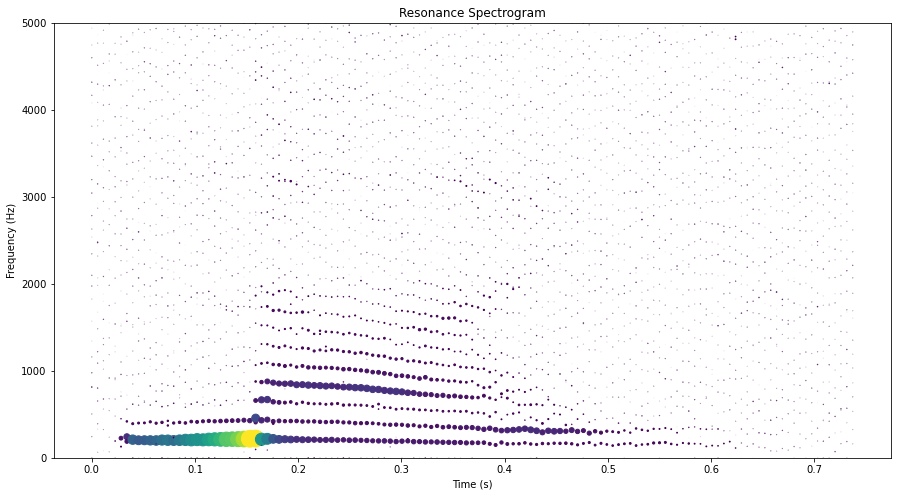

In [3]:
plot_spectrogram(noisy_spectrogram, signal = None, min_freq = 0, max_freq = 5000, scale=500)

## 3. Noise reduction

The denoising function consists of three different denoising algorithms:

    - Density: Low density resonances are attenuated
    - Power: Low power resonances are filtered
    - Dynamic resonances: Filter resonances based on their dynamic resonance properties
    
We can select the main parameters of each filter in the denoise function used below:

In [4]:
denoised_spectrogram = denoise(noisy_spectrogram, density_factor = 50, power_factor = 0.1, 
                               min_overlap = None, min_length = None)

Plot the denoised resonace spectrogram

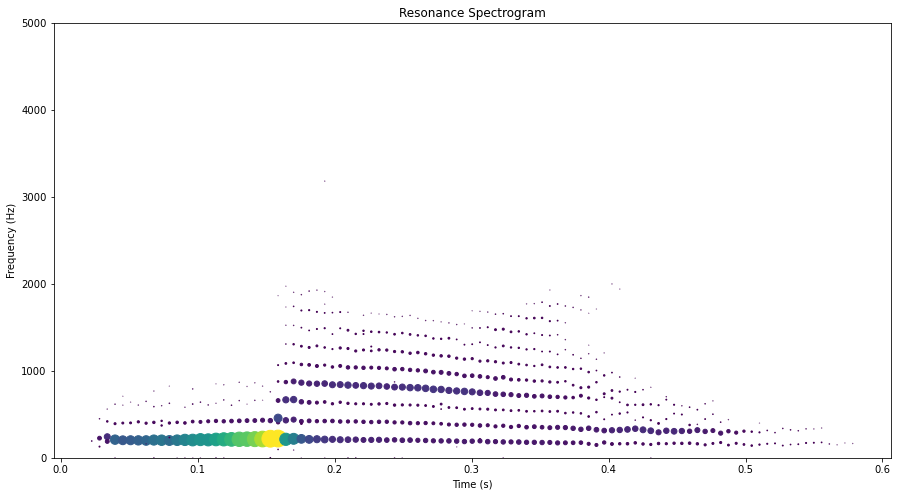

In [5]:
plot_spectrogram(denoised_spectrogram, signal = None, min_freq = 0, max_freq = 5000, scale=500)

Plot the noisy and denoised signal in time:

[]

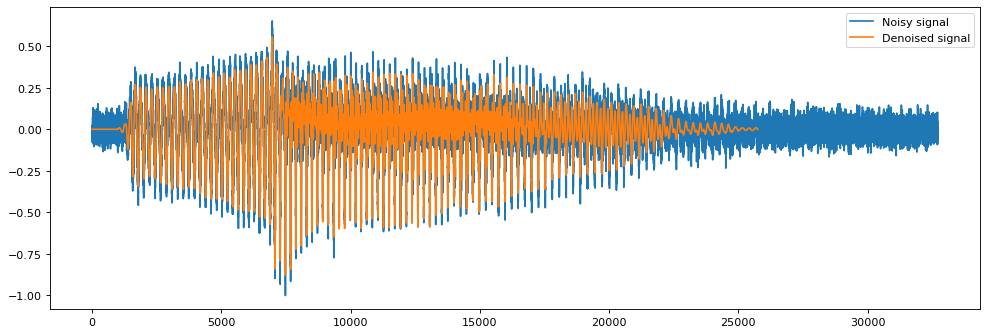

In [6]:
plt.figure(figsize=(15, 5), dpi=80)
plt.plot(noisy_signal/np.max(np.abs(noisy_signal)), label = "Noisy signal")
plt.plot(denoised_spectrogram.reconstruction.real, label = "Denoised signal")
plt.legend()
plt.plot()

Reproduce the audio of the noisy and denoised signals

Noisy signal:

In [7]:
ipd.Audio(data = noisy_signal, rate = noisy_spectrogram.sample_rate[0])

Denoised signal:

In [8]:
ipd.Audio(data = denoised_spectrogram.reconstruction.real, rate = noisy_spectrogram.sample_rate[0])

In [9]:
write("nine-denoised.wav", noisy_spectrogram.sample_rate[0], denoised_spectrogram.reconstruction.real)